# Roibal Real Estate Valuation Bot

## Downloading, Analyzing, Visualization Real Estate Data to find undervalued Properties


Fetching data from: https://www.zillow.com/homes/for_sale/Rio-Rancho,-NM_rb/
CSV loaded successfully.
Cleaning data...
---Data Columns---
Index(['Unnamed: 0', 'zpid', 'rawHomeStatusCd', 'marketingStatusSimplifiedCd',
       'imgSrc', 'hasImage', 'detailUrl', 'statusType', 'statusText', 'price',
       'priceLabel', 'address', 'beds', 'baths', 'area', 'flexFieldText',
       'contentType', 'isUserClaimingOwner', 'isUserConfirmedClaim', 'pgapt',
       'sgapt', 'shouldShowZestimateAsPrice', 'has3DModel', 'hasVideo',
       'isHomeRec', 'hasAdditionalAttributions', 'isFeaturedListing',
       'isShowcaseListing', 'listingType', 'isFavorite', 'visited',
       'brokerName', 'timeOnZillow', 'latLong.latitude', 'latLong.longitude',
       'hdpData.homeInfo.zpid', 'hdpData.homeInfo.streetAddress',
       'hdpData.homeInfo.zipcode', 'hdpData.homeInfo.city',
       'hdpData.homeInfo.state', 'hdpData.homeInfo.latitude',
       'hdpData.homeInfo.longitude', 'hdpData.homeInfo.dateSold',
       'hd

<ipython-input-7-e64f798fa29c>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[price] = df[price].astype(float)
<ipython-input-7-e64f798fa29c>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hdpData.homeInfo.livingArea'] = df['hdpData.homeInfo.livingArea'].astype(float)
<ipython-input-7-e64f798fa29c>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

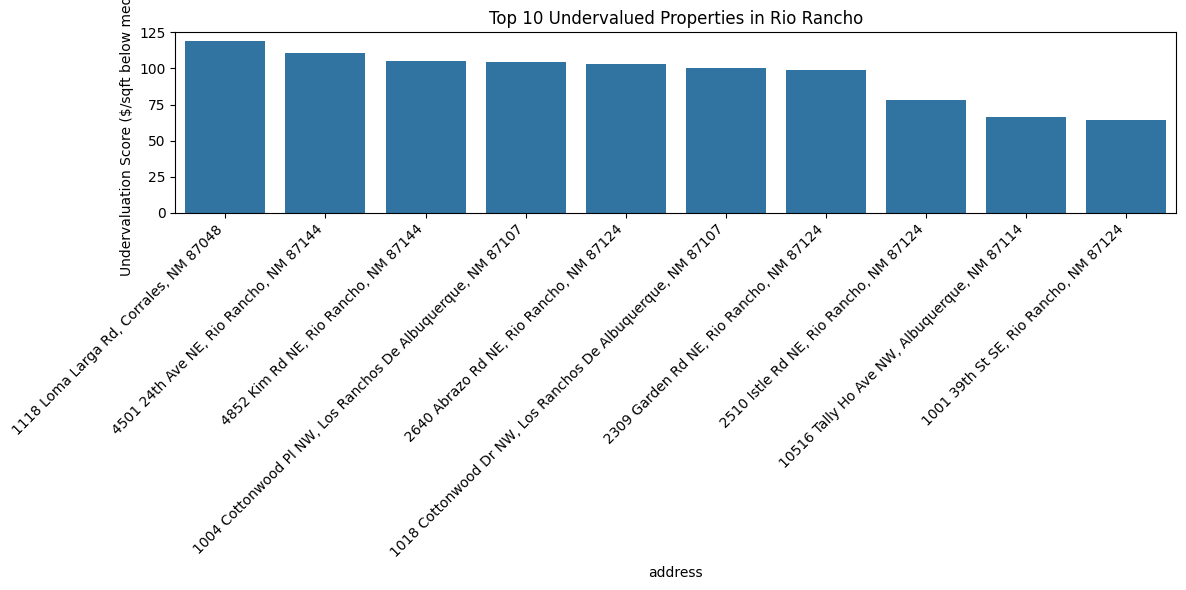

Number of Sold Properties Analyzed:  471


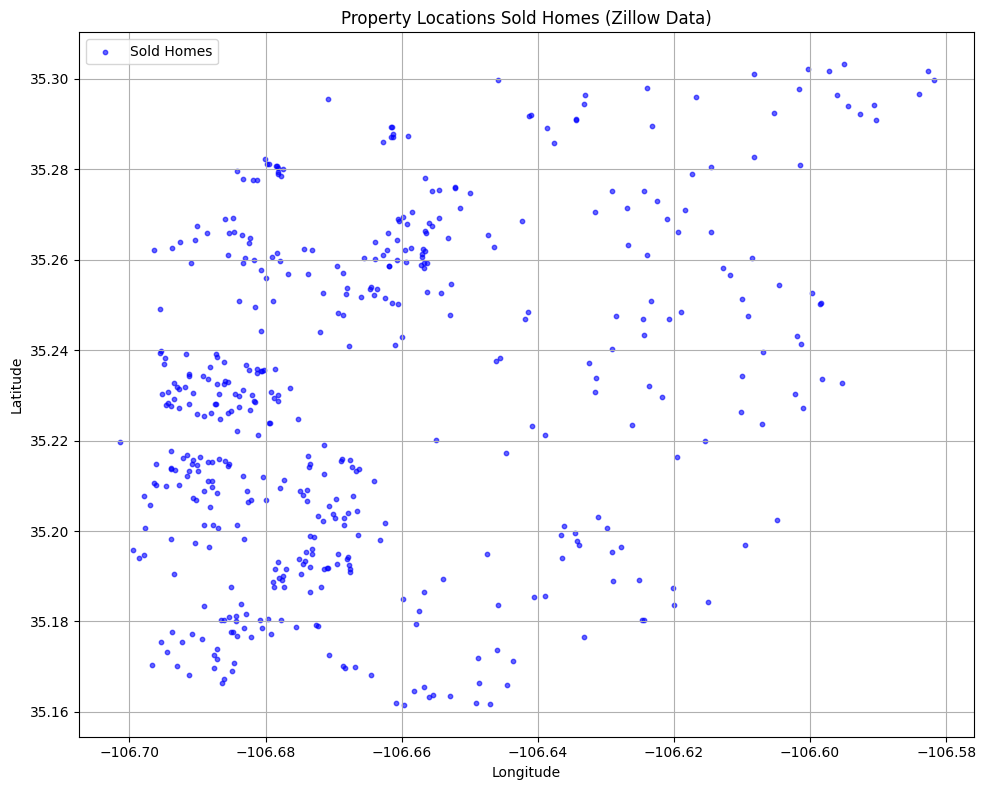

In [ ]:
# HomeMatch AI - Zillow Real Estate Analyzer (Rio Rancho Version)
# Refactored for Google CoLab - Single Notebook Workflow
# Use New Mexico Exploratory Data Analysis for downloading new zillow data

# === Imports ===
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

# === CONFIG ===
SEARCH_URL = "https://www.zillow.com/homes/for_sale/Rio-Rancho,-NM_rb/"
HEADERS = {'User-Agent': 'Mozilla/5.0'}

# === Data Ingestion ===
def fetch_zillow_data(search_url):
    print(f"Fetching data from: {search_url}")
    # Placeholder: upload your CSV from Zillow manually into Colab
    try:
        #df = pd.read_csv('/content/drive/MyDrive/HomeMatch AI/zillow_data.csv')
        df = pd.read_csv('/content/drive/MyDrive/HomeMatch AI/RioRancho_Sold_4br_homes_5_28_2025.csv')
        print("CSV loaded successfully.")
    except FileNotFoundError:
        print("Please upload 'zillow_data.csv' into the current directory.")
        df = pd.DataFrame()
    return df

# === Data Cleaning ===
def clean_property_data(df):
    print("Cleaning data...")
    print("---Data Columns---")
    print(df.columns)
    print("---Data Description---")
    print(df.describe())
    price = 'hdpData.homeInfo.taxAssessedValue'
    #price = 'price'
    df = df.dropna(subset=[price, 'hdpData.homeInfo.livingArea', 'address'])
    #df = df[df['sqft'] > 0]
    df[price] = df[price].astype(float)
    df['hdpData.homeInfo.livingArea'] = df['hdpData.homeInfo.livingArea'].astype(float)
    df['address'] = df['address'].astype(str)
    return df




# === Analysis: Find Undervalued Properties ===
def find_undervalued(df):
    print("Analyzing for undervalued properties...")
    price = 'hdpData.homeInfo.taxAssessedValue'
    #price = 'price'
    df['price_per_sqft'] = df[price] / df['hdpData.homeInfo.livingArea']
    median = df['price_per_sqft'].median()
    print(f"Median Price Per Square Foot: " , median)
    df['undervaluation_score'] = median - df['price_per_sqft']
    top_10 = df.sort_values(by='undervaluation_score', ascending=False).head(10)
    return top_10

# === Visualization ===
def visualize_properties(df):
    print("Visualizing top properties...")
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='address', y='undervaluation_score')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Undervaluation Score ($/sqft below median)")
    plt.title("Top 10 Undervalued Properties in Rio Rancho")
    plt.tight_layout()
    plt.show()

def plot_sales_locations(df_sold):
  # === Visualize: plot scatter plot of location of homes

  #print(df_sold.describe())

  print("Number of Sold Properties Analyzed: ", len(df_sold))
  # Ensure required columns exist
  if 'hdpData.homeInfo.latitude' in df_sold.columns and 'hdpData.homeInfo.longitude' in df_sold.columns:
    # Drop rows with missing coordinates
    df_points = df_sold.dropna(subset=['hdpData.homeInfo.latitude', 'hdpData.homeInfo.longitude'])

    # Plot simple scatter of all property points
    plt.figure(figsize=(10, 8))
    plt.scatter(df_points['hdpData.homeInfo.longitude'], df_points['hdpData.homeInfo.latitude'], alpha=0.6, s=10, c='blue', label='Sold Homes')
    plt.title("Property Locations Sold Homes (Zillow Data)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
  else:
    print("The dataset must contain 'latitude' and 'longitude' columns.")

# === Main Pipeline ===
def main():
    price = 'hdpData.homeInfo.taxAssessedValue'
    #price = 'price'
    df = fetch_zillow_data(SEARCH_URL)
    if df.empty:
        print("No data loaded. Please check the file or scraper.")
        return
    df_clean = clean_property_data(df)
    top_10 = find_undervalued(df_clean)
    print("\n🏘️ Top 10 Undervalued Properties:")
    print(top_10[['address', price, 'hdpData.homeInfo.livingArea', 'price_per_sqft', 'undervaluation_score']])
    visualize_properties(top_10)
    plot_sales_locations(df_clean)

# Run the full workflow
main()


## Generating Heat Map of Sold Rio Rancho Properties

<ipython-input-41-1d27b4186e04>:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  roads_in_sandoval = roads[roads.geometry.intersects(sandoval.unary_union)]
<ipython-input-41-1d27b4186e04>:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  roads_in_bernalillo = roads[roads.geometry.intersects(bernalillo.unary_union)]


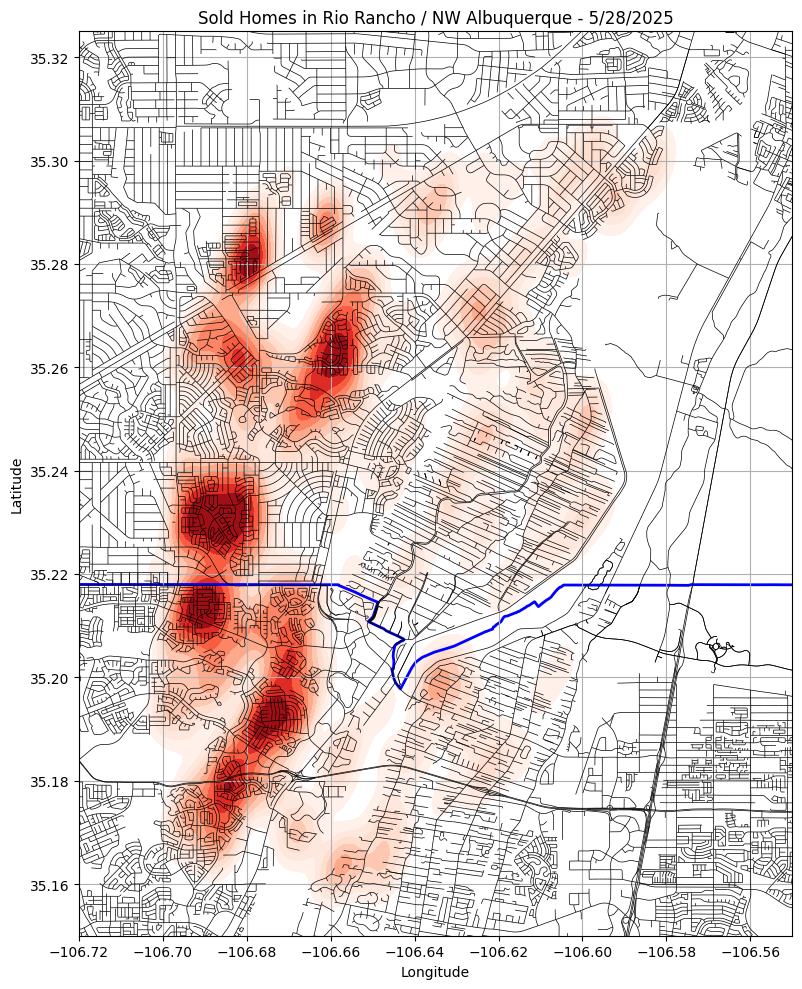

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd

# Load Road shapefile (adjust filename if needed)
roads = gpd.read_file("/content/drive/MyDrive/New Mexico Analysis/Data/NM911_RCL_202504/NM911_RCL_202504.shp")
roads = roads.to_crs(epsg=4326)
#Load New Mexico Counties
nm_counties_shapefile = '/content/drive/MyDrive/New Mexico Analysis/Data/tl_2018_nm_county/tl_2018_nm_county.shp'
gdf_counties = gpd.read_file(nm_counties_shapefile)

# Filter to just Sandoval County
sandoval = gdf_counties[gdf_counties['NAME'].str.strip().str.lower() == 'sandoval']
bernalillo = gdf_counties[gdf_counties['NAME'].str.strip().str.lower() == 'bernalillo']
sandoval = sandoval.to_crs(epsg=4326)
bernalillo = bernalillo.to_crs(epsg=4326)


# Filter to major roads if column exists (e.g., RD_CLASS)
if 'RD_CLASS' in roads.columns:
    major_roads = roads[roads['RD_CLASS'].isin(['A00', 'A11', 'A21', 'A40'])]  # adjust values as needed
else:
    major_roads = roads

roads_in_sandoval = roads[roads.geometry.intersects(sandoval.unary_union)]
roads_in_bernalillo = roads[roads.geometry.intersects(bernalillo.unary_union)]

# Load the uploaded CSV file that includes previously sold homes
# Assuming the file was manually uploaded in Google Colab or from the notebook
file_path = "/content/drive/MyDrive/HomeMatch AI/RioRancho_Sold_4br_homes_5_28_2025.csv"  # Placeholder file path
try:
    df_sold = pd.read_csv(file_path)
except FileNotFoundError:
    df_sold = None

# Preview and clean the data for mapping
if df_sold is not None:
    # Drop rows with missing lat/lon values
    df_sold = df_sold.dropna(subset=['latLong.latitude', 'latLong.longitude'])

    # Basic plot configuration
    #plt.figure(figsize=(10, 8))
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.kdeplot(
        x=df_sold['latLong.longitude'],
        y=df_sold['latLong.latitude'],
        cmap="Reds",
        fill=True,
        bw_adjust=0.3,
        thresh=0.05,
        label="Sold Homes Heat Map"
    )

    # Plot roads
    roads_in_sandoval.plot(ax=plt.gca(), linewidth=0.5, edgecolor='black', label='Roads')
    roads_in_bernalillo.plot(ax=plt.gca(), linewidth=0.5, edgecolor='black', label='Roads')

    # Plot with red border, no fill
    sandoval.plot(ax=plt.gca(), edgecolor='blue', facecolor='none', linewidth=2, figsize=(8, 8), label="Sandoval County Line")

    # Zoom into the southern urban area of Sandoval County
    ax.set_xlim(-106.72, -106.55)
    ax.set_ylim(35.15, 35.325)
    #plt.title("Tax Assessed Value per Sq Ft with Roads Overlay (Rio Rancho) - 5/28/2025")
    plt.title("Sold Homes in Rio Rancho / NW Albuquerque - 5/28/2025")
    #plt.title("Heat Map of Sold Homes in Rio Rancho - 5/28/2025")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.tight_layout()
    #plt.legend()
    plt.show()
else:
    print("CSV file with sold home data not found. Please upload and retry.")


## Heat Map Assessed Values (Rio Rancho)

<ipython-input-55-d4ecf4e1ab2a>:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  roads_in_sandoval = roads[roads.geometry.intersects(sandoval.unary_union)]
<ipython-input-55-d4ecf4e1ab2a>:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  roads_in_bernalillo = roads[roads.geometry.intersects(bernalillo.unary_union)]


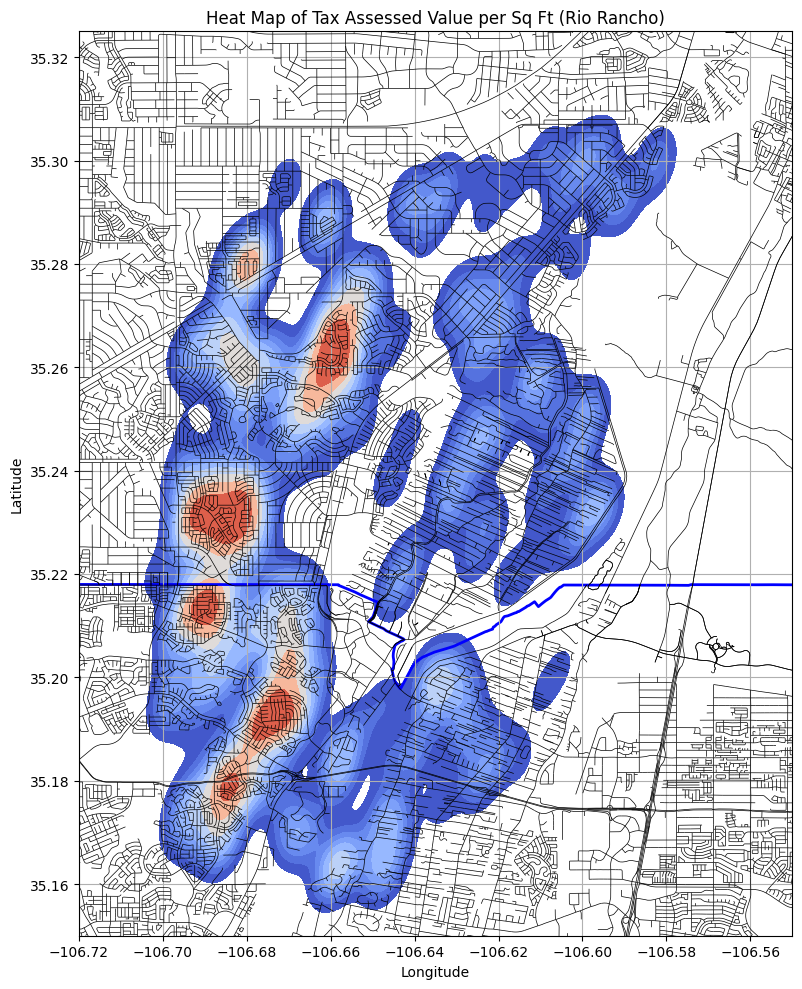

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd

# Load Road shapefile (adjust filename if needed)
roads = gpd.read_file("/content/drive/MyDrive/New Mexico Analysis/Data/NM911_RCL_202504/NM911_RCL_202504.shp")
roads = roads.to_crs(epsg=4326)
#Load New Mexico Counties
nm_counties_shapefile = '/content/drive/MyDrive/New Mexico Analysis/Data/tl_2018_nm_county/tl_2018_nm_county.shp'
gdf_counties = gpd.read_file(nm_counties_shapefile)

# Filter to just Sandoval County
sandoval = gdf_counties[gdf_counties['NAME'].str.strip().str.lower() == 'sandoval']
bernalillo = gdf_counties[gdf_counties['NAME'].str.strip().str.lower() == 'bernalillo']
sandoval = sandoval.to_crs(epsg=4326)
bernalillo = bernalillo.to_crs(epsg=4326)


# Filter to major roads if column exists (e.g., RD_CLASS)
if 'RD_CLASS' in roads.columns:
    major_roads = roads[roads['RD_CLASS'].isin(['A00', 'A11', 'A21', 'A40'])]  # adjust values as needed
else:
    major_roads = roads

roads_in_sandoval = roads[roads.geometry.intersects(sandoval.unary_union)]
roads_in_bernalillo = roads[roads.geometry.intersects(bernalillo.unary_union)]

# Load the uploaded CSV file that includes previously sold homes
# Assuming the file was manually uploaded in Google Colab or from the notebook
file_path = "/content/drive/MyDrive/HomeMatch AI/RioRancho_Sold_4br_homes_5_28_2025.csv"  # Placeholder file path
try:
    df_sold = pd.read_csv(file_path)
except FileNotFoundError:
    df_sold = None

# Preview and clean the data for mapping
#if df_sold is None:
    # Drop rows with missing lat/lon values
df_sold = df_sold.dropna(subset=['latLong.latitude', 'latLong.longitude'])

    # Basic plot configuration
    #plt.figure(figsize=(10, 8))
fig, ax = plt.subplots(figsize=(10, 10))
"""sns.kdeplot(
        x=df_sold['latLong.longitude'],
        y=df_sold['latLong.latitude'],
        cmap="Reds",
        fill=True,
        bw_adjust=0.3,
        thresh=0.05,
        label="Sold Homes Heat Map"
    )"""
    # Ensure required columns are present
required_columns = ['latLong.latitude', 'latLong.longitude', 'hdpData.homeInfo.taxAssessedValue', 'hdpData.homeInfo.livingArea']
missing_cols = [col for col in required_columns if col not in df_sold.columns]

if missing_cols:
    print(f"Missing required columns: {missing_cols}")
else:
        # Drop missing or invalid entries
    df_map = df_sold.dropna(subset= required_columns) #['latitude', 'longitude', 'tax_assessed_value', 'sqft'])
    df_map = df_map[df_map['hdpData.homeInfo.livingArea'] > 0]

        # Calculate assessed value per square foot
    df_map['tax_value_per_sqft'] = df_map[required_columns[2]] / df_map[required_columns[3]]

#df_map = df_map.to_crs(epsg=4326)

sns.kdeplot(
          ax=plt.gca(),
          x=df_map[required_columns[1]],
          y=df_map[required_columns[0]],
          weights=df_map['tax_value_per_sqft'],
          cmap="coolwarm",
          fill=True,
          bw_adjust=0.3,
          thresh=0.05
      )

      # Plot roads
roads_in_sandoval.plot(ax=plt.gca(), linewidth=0.5, edgecolor='black', label='Roads')
roads_in_bernalillo.plot(ax=plt.gca(), linewidth=0.5, edgecolor='black', label='Roads')

      # Plot with blue border, no fill
sandoval.plot(ax=plt.gca(), edgecolor='blue', facecolor='none', linewidth=2, figsize=(8, 8), label="Sandoval County Line")


      #plt.title("Tax Assessed Value per Sq Ft with Roads Overlay (Rio Rancho) - 5/28/2025")
"""    plt.title("Sold Homes in Rio Rancho / NW Albuquerque - 5/28/2025")
      #plt.title("Heat Map of Sold Homes in Rio Rancho - 5/28/2025")
      plt.xlabel("Longitude")
      plt.ylabel("Latitude")
      plt.grid(True)
      plt.tight_layout()
      #plt.legend()
      plt.show()
  else:
      print("CSV file with sold home data not found. Please upload and retry.")

  """
      # Plot heat map
      #plt.figure(figsize=(10, 8))


      # Zoom into the southern urban area of Sandoval County
ax.set_xlim(-106.72, -106.55)
ax.set_ylim(35.15, 35.325)

plt.title("Heat Map of Tax Assessed Value per Sq Ft (Rio Rancho)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
      #plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-56-2f0898379175>:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  roads_in_sandoval = roads[roads.geometry.intersects(sandoval.unary_union)]
<ipython-input-56-2f0898379175>:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  roads_in_bernalillo = roads[roads.geometry.intersects(bernalillo.unary_union)]


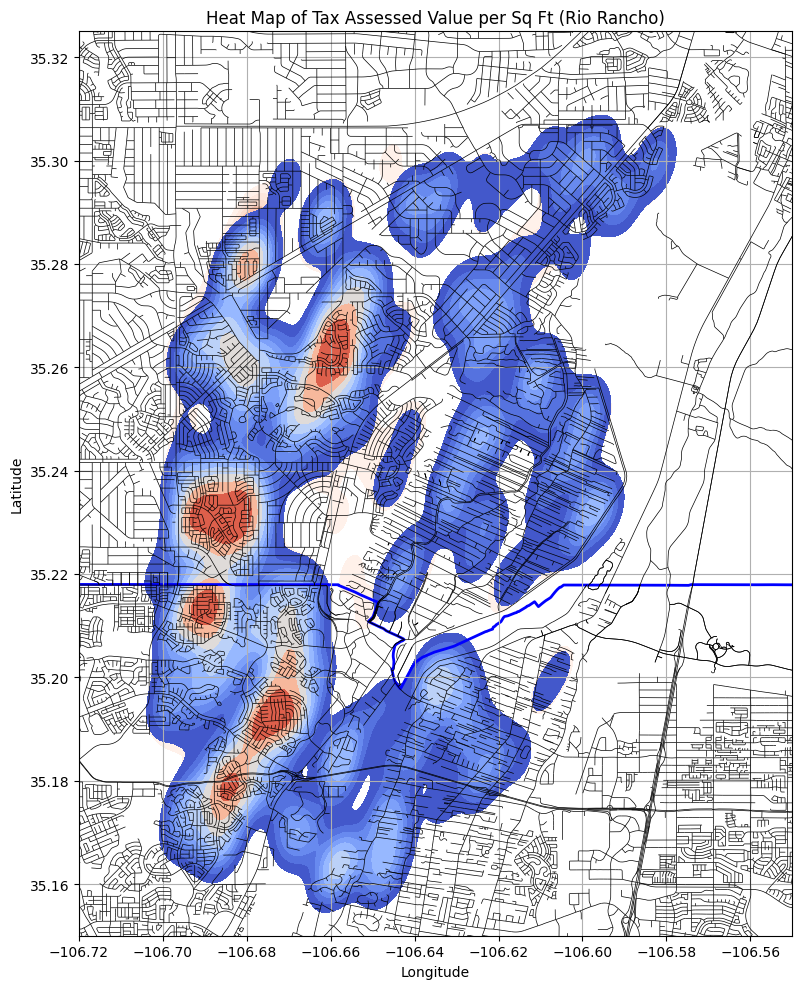

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd

# Load Road shapefile (adjust filename if needed)
roads = gpd.read_file("/content/drive/MyDrive/New Mexico Analysis/Data/NM911_RCL_202504/NM911_RCL_202504.shp")
roads = roads.to_crs(epsg=4326)
#Load New Mexico Counties
nm_counties_shapefile = '/content/drive/MyDrive/New Mexico Analysis/Data/tl_2018_nm_county/tl_2018_nm_county.shp'
gdf_counties = gpd.read_file(nm_counties_shapefile)

# Filter to just Sandoval County
sandoval = gdf_counties[gdf_counties['NAME'].str.strip().str.lower() == 'sandoval']
bernalillo = gdf_counties[gdf_counties['NAME'].str.strip().str.lower() == 'bernalillo']
sandoval = sandoval.to_crs(epsg=4326)
bernalillo = bernalillo.to_crs(epsg=4326)


# Filter to major roads if column exists (e.g., RD_CLASS)
if 'RD_CLASS' in roads.columns:
    major_roads = roads[roads['RD_CLASS'].isin(['A00', 'A11', 'A21', 'A40'])]  # adjust values as needed
else:
    major_roads = roads

roads_in_sandoval = roads[roads.geometry.intersects(sandoval.unary_union)]
roads_in_bernalillo = roads[roads.geometry.intersects(bernalillo.unary_union)]

# Load the uploaded CSV file that includes previously sold homes
# Assuming the file was manually uploaded in Google Colab or from the notebook
file_path = "/content/drive/MyDrive/HomeMatch AI/RioRancho_Sold_4br_homes_5_28_2025.csv"  # Placeholder file path
try:
    df_sold = pd.read_csv(file_path)
except FileNotFoundError:
    df_sold = None

# Preview and clean the data for mapping
#if df_sold is None:
    # Drop rows with missing lat/lon values
df_sold = df_sold.dropna(subset=['latLong.latitude', 'latLong.longitude'])

    # Basic plot configuration
    #plt.figure(figsize=(10, 8))
fig, ax = plt.subplots(figsize=(10, 10))
"""sns.kdeplot(
        x=df_sold['latLong.longitude'],
        y=df_sold['latLong.latitude'],
        cmap="Reds",
        fill=True,
        bw_adjust=0.3,
        thresh=0.05,
        label="Sold Homes Heat Map"
    )"""
    # Ensure required columns are present
required_columns = ['latLong.latitude', 'latLong.longitude', 'hdpData.homeInfo.taxAssessedValue', 'hdpData.homeInfo.livingArea']
missing_cols = [col for col in required_columns if col not in df_sold.columns]

if missing_cols:
    print(f"Missing required columns: {missing_cols}")
else:
        # Drop missing or invalid entries
    df_map = df_sold.dropna(subset= required_columns) #['latitude', 'longitude', 'tax_assessed_value', 'sqft'])
    df_map = df_map[df_map['hdpData.homeInfo.livingArea'] > 0]

        # Calculate assessed value per square foot
    df_map['tax_value_per_sqft'] = df_map[required_columns[2]] / df_map[required_columns[3]]

#df_map = df_map.to_crs(epsg=4326)

sns.kdeplot(
          ax=plt.gca(),
          x=df_map[required_columns[1]],
          y=df_map[required_columns[0]],
          weights=df_map['tax_value_per_sqft'],
          cmap="coolwarm",
          fill=True,
          bw_adjust=0.3,
          thresh=0.05
      )

      # Plot roads
roads_in_sandoval.plot(ax=plt.gca(), linewidth=0.5, edgecolor='black', label='Roads')
roads_in_bernalillo.plot(ax=plt.gca(), linewidth=0.5, edgecolor='black', label='Roads')

      # Plot with blue border, no fill
sandoval.plot(ax=plt.gca(), edgecolor='blue', facecolor='none', linewidth=2, figsize=(8, 8), label="Sandoval County Line")


      #plt.title("Tax Assessed Value per Sq Ft with Roads Overlay (Rio Rancho) - 5/28/2025")
"""    plt.title("Sold Homes in Rio Rancho / NW Albuquerque - 5/28/2025")
      #plt.title("Heat Map of Sold Homes in Rio Rancho - 5/28/2025")
      plt.xlabel("Longitude")
      plt.ylabel("Latitude")
      plt.grid(True)
      plt.tight_layout()
      #plt.legend()
      plt.show()
  else:
      print("CSV file with sold home data not found. Please upload and retry.")

  """
      # Plot heat map
      #plt.figure(figsize=(10, 8))


      # Zoom into the southern urban area of Sandoval County
ax.set_xlim(-106.72, -106.55)
ax.set_ylim(35.15, 35.325)

plt.title("Heat Map of Tax Assessed Value per Sq Ft (Rio Rancho)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
      #plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Generating Polygons / Shapefiles from Analyzed Area

<ipython-input-27-c4f884dbaf40>:33: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  roads_in_sandoval = roads[roads.geometry.intersects(sandoval.unary_union)]
<ipython-input-27-c4f884dbaf40>:34: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  roads_in_bernalillo = roads[roads.geometry.intersects(bernalillo.unary_union)]
<ipython-input-27-c4f884dbaf40>:82: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


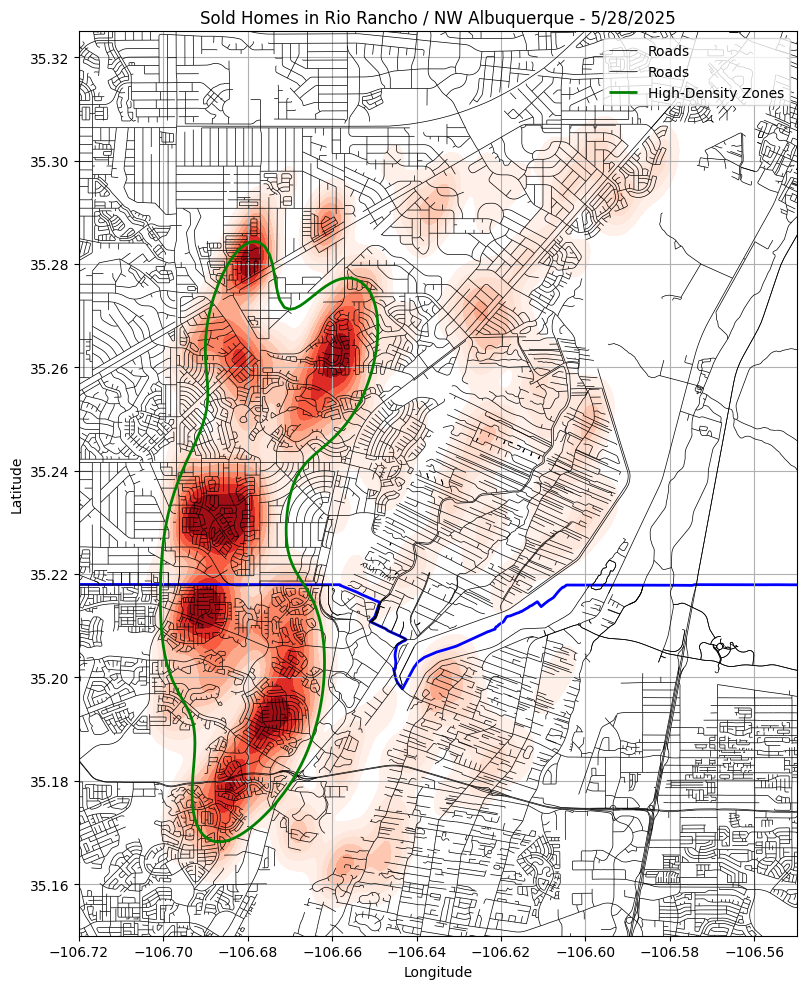

⚠️ No valid polygons created from contour.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
from shapely.geometry import Polygon

import geopandas as gpd

# Load high sales density area shapefile
zones = gpd.read_file("/content/drive/MyDrive/HomeMatch AI/RioRancho_high_density_regionsTEST.shp")

# Load Road shapefile (adjust filename if needed)
roads = gpd.read_file("/content/drive/MyDrive/New Mexico Analysis/Data/NM911_RCL_202504/NM911_RCL_202504.shp")
roads = roads.to_crs(epsg=4326)
#Load New Mexico Counties
nm_counties_shapefile = '/content/drive/MyDrive/New Mexico Analysis/Data/tl_2018_nm_county/tl_2018_nm_county.shp'
gdf_counties = gpd.read_file(nm_counties_shapefile)

# Filter to just Sandoval County
sandoval = gdf_counties[gdf_counties['NAME'].str.strip().str.lower() == 'sandoval']
bernalillo = gdf_counties[gdf_counties['NAME'].str.strip().str.lower() == 'bernalillo']
sandoval = sandoval.to_crs(epsg=4326)
bernalillo = bernalillo.to_crs(epsg=4326)


# Filter to major roads if column exists (e.g., RD_CLASS)
if 'RD_CLASS' in roads.columns:
    major_roads = roads[roads['RD_CLASS'].isin(['A00', 'A11', 'A21', 'A40'])]  # adjust values as needed
else:
    major_roads = roads

roads_in_sandoval = roads[roads.geometry.intersects(sandoval.unary_union)]
roads_in_bernalillo = roads[roads.geometry.intersects(bernalillo.unary_union)]

# Load the uploaded CSV file that includes previously sold homes
# Assuming the file was manually uploaded in Google Colab or from the notebook
file_path = "/content/drive/MyDrive/HomeMatch AI/RioRancho_Sold_4br_homes_5_28_2025.csv"  # Placeholder file path
try:
    df_sold = pd.read_csv(file_path)
except FileNotFoundError:
    df_sold = None

# Preview and clean the data for mapping
if df_sold is not None:
    # Drop rows with missing lat/lon values
    df_sold = df_sold.dropna(subset=['latLong.latitude', 'latLong.longitude'])

    # Basic plot configuration
    #plt.figure(figsize=(10, 8))
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.kdeplot(
        x=df_sold['latLong.longitude'],
        y=df_sold['latLong.latitude'],
        cmap="Reds",
        fill=True,
        bw_adjust=0.3,
        thresh=0.05,
        label="Sold Homes Heat Map"
    )

    # Plot roads
    roads_in_sandoval.plot(ax=plt.gca(), linewidth=0.5, edgecolor='black', label='Roads')
    roads_in_bernalillo.plot(ax=plt.gca(), linewidth=0.5, edgecolor='black', label='Roads')

    # Plot county with blue border, no fill
    sandoval.plot(ax=plt.gca(), edgecolor='blue', facecolor='none', linewidth=2, figsize=(8, 8), label="Sandoval County Line")
    # Overlay shapefile polygons
    zones.boundary.plot(ax=plt.gca(), color='green', linewidth=2, label='High-Density Zones')


    # Zoom into the southern urban area of Sandoval County
    ax.set_xlim(-106.72, -106.55)
    ax.set_ylim(35.15, 35.325)
    #plt.title("Tax Assessed Value per Sq Ft with Roads Overlay (Rio Rancho) - 5/28/2025")
    plt.title("Sold Homes in Rio Rancho / NW Albuquerque - 5/28/2025")
    #plt.title("Heat Map of Sold Homes in Rio Rancho - 5/28/2025")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()
else:
    print("CSV file with sold home data not found. Please upload and retry.")

# Extract coordinates
coords = df_sold[['latLong.longitude', 'latLong.latitude']].dropna().to_numpy().T

# Step 2: Generate KDE
kde = gaussian_kde(coords, bw_method=0.3)
xmin, xmax = coords[0].min(), coords[0].max()
ymin, ymax = coords[1].min(), coords[1].max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde(positions).T, X.shape)

# Step 3: Create contour and extract polygons
fig = plt.figure()
CS = plt.contour(X, Y, Z, levels=[np.percentile(Z, 80)])
#CS.layers()
#plt.show()
plt.close(fig)

# Step 4: Convert contours to shapely polygons
polygons = []
#print(len(CS))
#for collection in CS:
for path in CS.get_paths():
    coords = path.vertices
    poly = Polygon(coords)
    if poly.is_valid:
        polygons.append(poly)

# Step 5: Save as GeoDataFrame and shapefile
if 0: #polygons:
    gdf = gpd.GeoDataFrame(geometry=polygons, crs="EPSG:4326")
    gdf.to_file("/content/drive/MyDrive/HomeMatch AI/RioRancho_high_density_regionsTEST.shp")
    print("✅ Shapefile created: high_density_regions.shp")
else:
    print("⚠️ No valid polygons created from contour.")

## Rio Rancho Land Analysis - Finding Top 10 Most Undervalued Lots in Specific Criteria

      price  hdpData.homeInfo.lotAreaValue  hdpData.homeInfo.latitude  \
0  $485,000                           1.48                  35.186970   
1  $299,900                           1.25                  35.218243   
2   $65,000                           1.00                  35.278797   
3  $158,000                           0.19                  35.147590   
4  $132,500                           5.00                  35.283115   

   hdpData.homeInfo.longitude                                       address  
0                 -106.632480  9013 Guadalupe Trl NW, Albuquerque, NM 87114  
1                 -106.625750           W Meadowlark Ln, Corrales, NM 87048  
2                 -106.620155    1300 Chihuahua Rd NE, Rio Rancho, NM 87144  
3                 -106.696000     Canada Vista Pl NW, Albuquerque, NM 87120  
4                 -106.644520        4610 15th Ave NE, Rio Rancho, NM 87144  


---Land Data Frame (Head)---

       price  lot_acres   latitude   longitude  \
0  485000.0

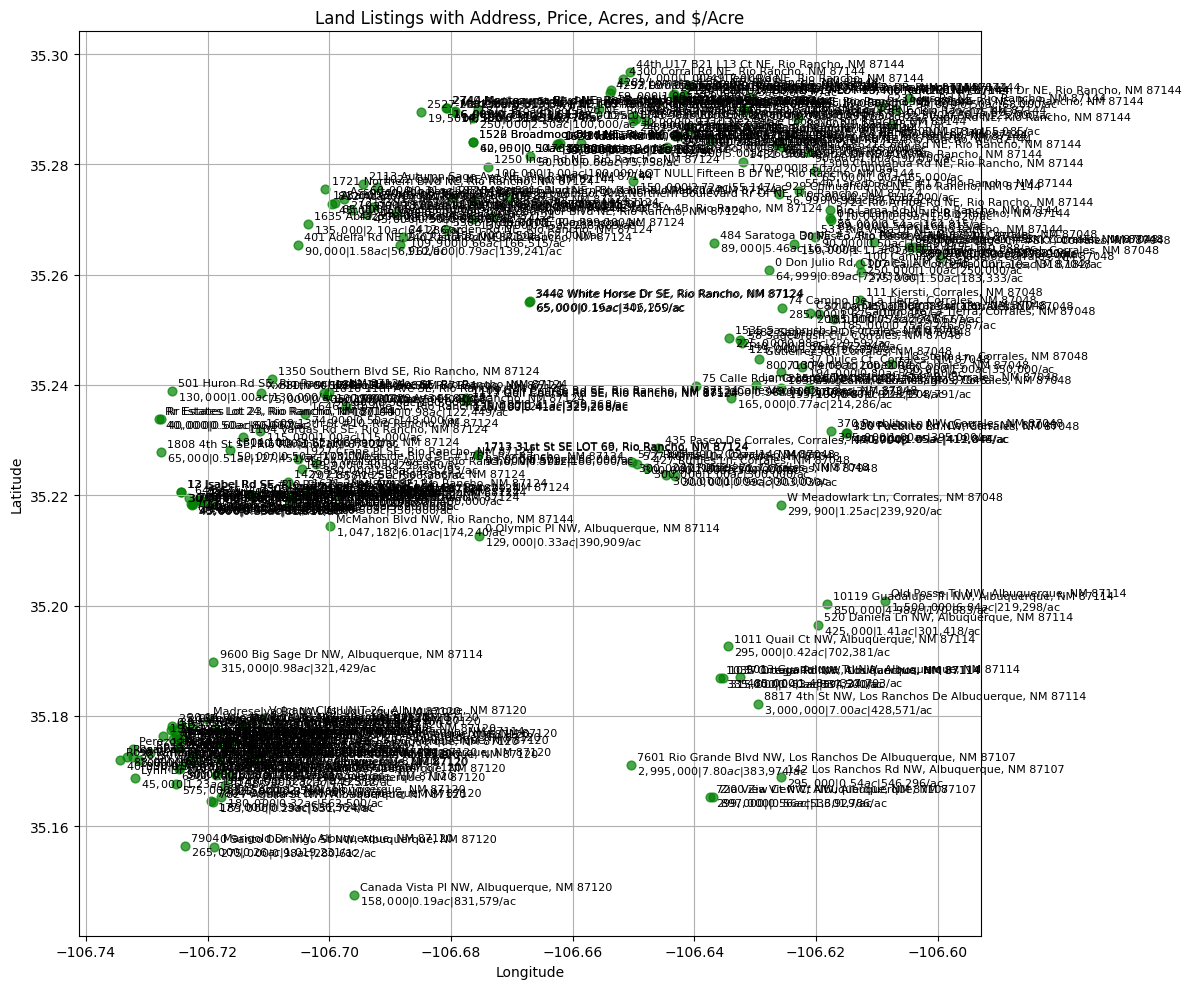

Number of Lots for sale in High Sales Area:               price  lot_acres   latitude   longitude  price_per_acre  \
count  2.500000e+01  25.000000  25.000000   25.000000       25.000000   
mean   2.101113e+05   1.072000  35.256253 -106.678572   233881.339376   
std    3.267751e+05   1.285972   0.023731    0.010680   148698.860276   
min    4.295000e+04   0.160000  35.212605 -106.699820    55147.058824   
25%    9.300000e+04   0.410000  35.237106 -106.680720   120000.000000   
50%    1.200000e+05   0.500000  35.266792 -106.676414   178000.000000   
75%    1.350000e+05   1.000000  35.273815 -106.675450   329268.292683   
max    1.481000e+06   6.010000  35.288330 -106.650030   630212.765957   

       index_right  
count         25.0  
mean           0.0  
std            0.0  
min            0.0  
25%            0.0  
50%            0.0  
75%            0.0  
max            0.0  
🏞️ Top 10 Cheapest Lots ($/Acre) Within High-Density Sale Zones:
                                            

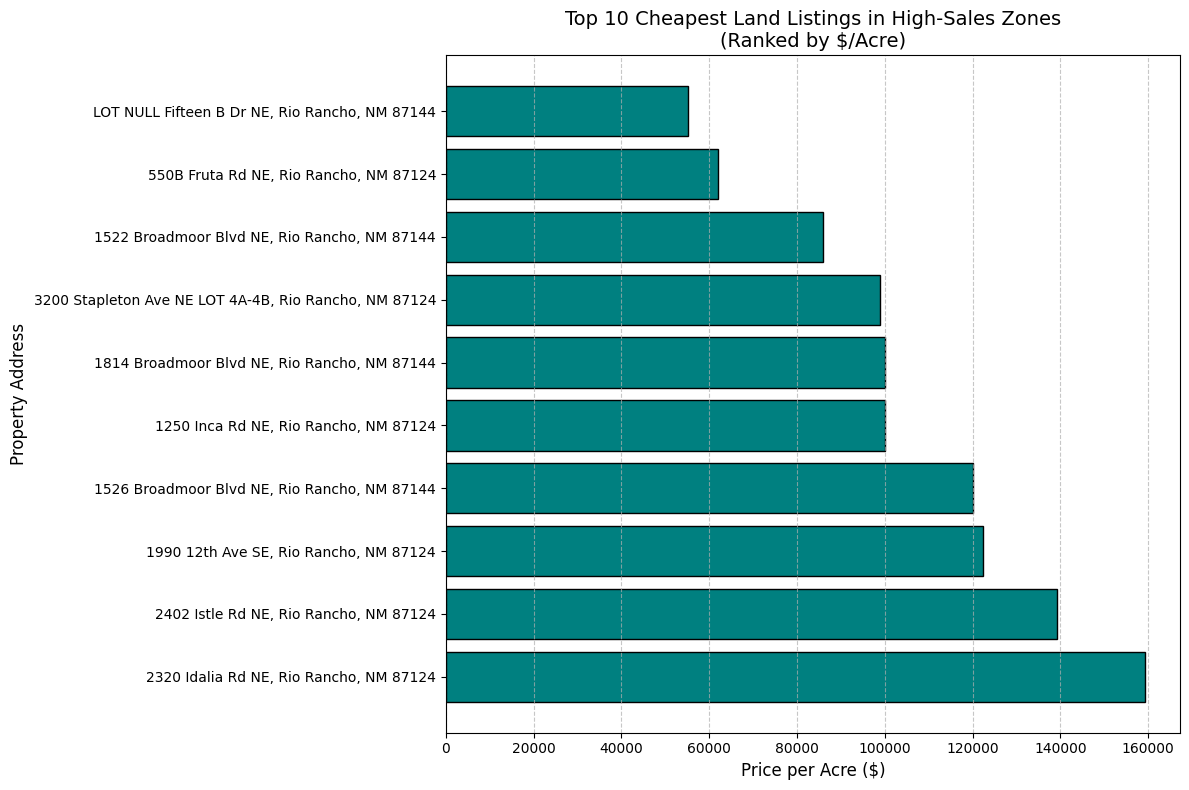

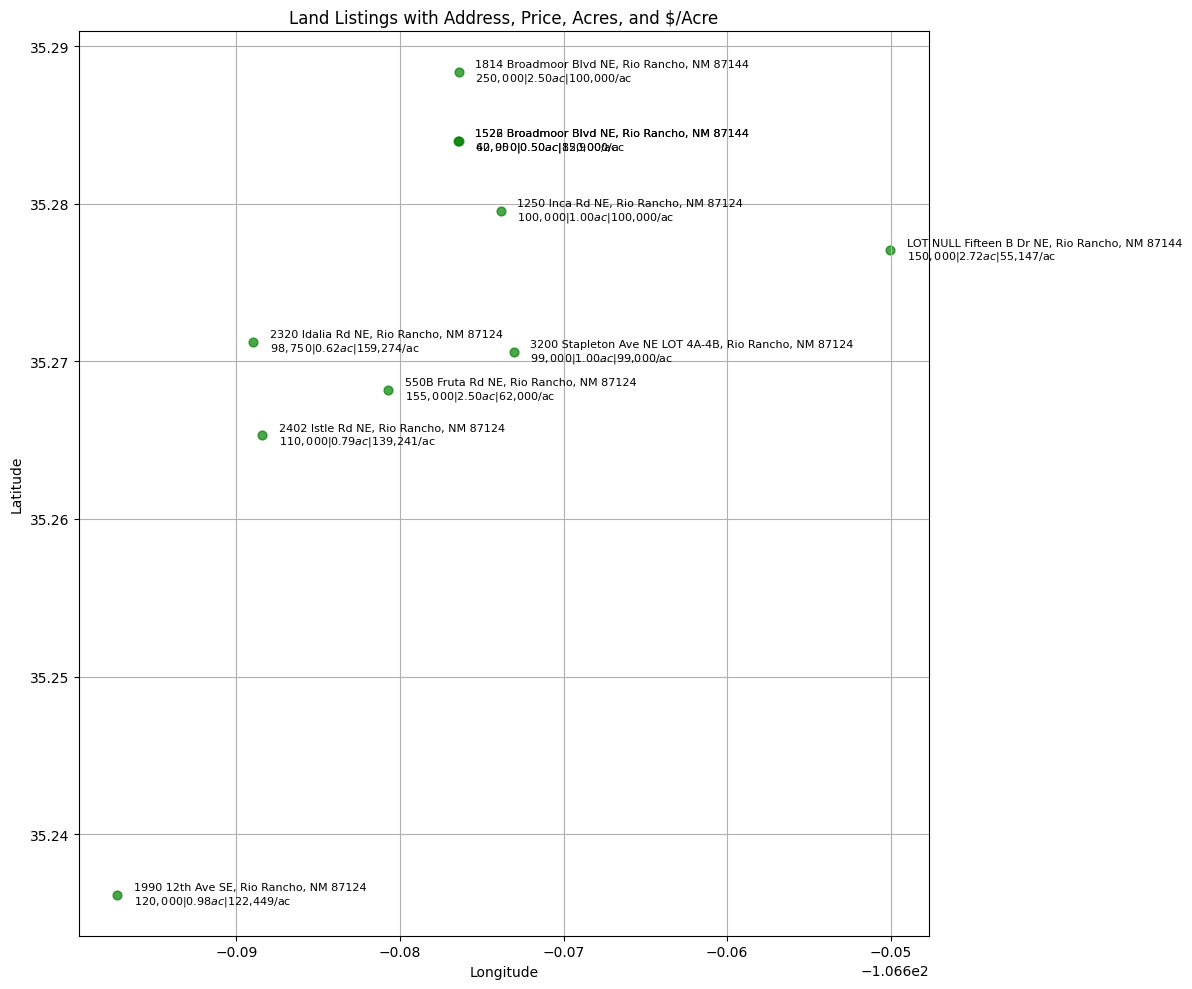

In [ ]:
from os import CLD_STOPPED
# === Required Imports ===
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from scipy.stats import gaussian_kde

# === Step 1: Load Land for Sale Data ===
land_df = pd.read_csv("/content/drive/MyDrive/RealEstateData/RR_Land_For_Sale_5_29_2025.csv")

# Remove the row with an incorrect specific address
land_df = land_df[land_df['address'] != "16 Saddleback Rd NW #17, Albuquerque, NM 87114"]

# Normalize lot size to acres
# If unit is 'sqft', convert to acres (1 acre = 43,560 sqft)
def convert_to_acres(row):
  if row['hdpData.homeInfo.lotAreaUnit'] == 'sqft':
      return row['hdpData.homeInfo.lotAreaValue'] / 43560
  else:  # assume it's already in acres
      return row['hdpData.homeInfo.lotAreaValue']

land_df['hdpData.homeInfo.lotAreaValue'] = land_df.apply(convert_to_acres, axis=1)


# Filter essential columns
land_df = land_df[['price', 'hdpData.homeInfo.lotAreaValue', 'hdpData.homeInfo.latitude', 'hdpData.homeInfo.longitude', 'address']].dropna()



print(land_df.head())
# Clean and rename columns
land_df['price'] = land_df['price'].replace('[\$,]', '', regex=True).astype(float)

land_df.rename(columns={
    'hdpData.homeInfo.lotAreaValue': 'lot_acres',
    'hdpData.homeInfo.latitude': 'latitude',
    'hdpData.homeInfo.longitude': 'longitude'
}, inplace=True)
land_df['price_per_acre'] = land_df['price'] / land_df['lot_acres']

print("\n\n---Land Data Frame (Head)---\n\n", land_df.head())
print("\n\n---Land Data Frame (Describe)---\n\n", land_df.describe())

#import matplotlib.pyplot as plt

# Create plot
plt.figure(figsize=(12, 10))
plt.scatter(land_df['longitude'], land_df['latitude'], color='green', alpha=0.7, s=40)

# Add labels for each point
for i, row in land_df.iterrows():
    label = f"{row['address']}\n${row['price']:,.0f} | {row['lot_acres']:.2f} ac | ${row['price_per_acre']:,.0f}/ac"
    plt.text(row['longitude'] + 0.001, row['latitude'], label, fontsize=8, ha='left', va='center')

# Format map
plt.title("Land Listings with Address, Price, Acres, and $/Acre")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(land_df['longitude'], land_df['latitude'])]
land_gdf = gpd.GeoDataFrame(land_df, geometry=geometry, crs="EPSG:4326")

# === Step 2: Rebuild High-Density Polygon Zones from Sold Homes Data ===
file_path = "/content/drive/MyDrive/HomeMatch AI/RioRancho_Sold_4br_homes_5_28_2025.csv"  # Placeholder file path
try:
    df_sold = pd.read_csv(file_path)
except FileNotFoundError:
    df_sold = None

# Assumes df_sold is already defined with 'latitude' and 'longitude'
coords = df_sold[['latLong.longitude', 'latLong.latitude']].dropna().to_numpy().T
kde = gaussian_kde(coords, bw_method=0.3)
xmin, xmax = coords[0].min(), coords[0].max()
ymin, ymax = coords[1].min(), coords[1].max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde(positions).T, X.shape)

# Generate contour at 80th percentile density
fig = plt.figure()
CS = plt.contour(X, Y, Z, levels=[np.percentile(Z, 75)])
plt.close(fig)

# Convert contour paths to shapely polygons
polygons = []
#for collection in CS.collections:
for path in CS.get_paths():
    poly = Polygon(path.vertices)
    if poly.is_valid:
        polygons.append(poly)

# Build GeoDataFrame of polygons
high_sales_zones = gpd.GeoDataFrame(geometry=polygons, crs="EPSG:4326")

# === Step 3: Filter Land Listings Within High-Density Zones ===
land_in_zones = gpd.sjoin(land_gdf, high_sales_zones, how="inner", predicate="intersects")
print("Number of Lots for sale in High Sales Area:", land_in_zones.describe())

# === Step 4: Output Top 10 Cheapest $/Acre ===
top_10 = land_in_zones.sort_values(by="price_per_acre").head(10)
top_10_display = top_10[['address', 'price', 'lot_acres', 'price_per_acre']].reset_index(drop=True)
print("🏞️ Top 10 Cheapest Lots ($/Acre) Within High-Density Sale Zones:")
print(top_10_display.to_string(index=False))

# Ensure top_10 is defined and cleaned
if 'top_10' in locals() and not top_10.empty:
    # Set plot size
    plt.figure(figsize=(12, 8))

    # Plot bars: Price per Acre
    plt.barh(
        top_10['address'],
        top_10['price_per_acre'],
        color='teal',
        edgecolor='black'
    )

    # Add labels
    #for index, row in top_10.iterrows():
    #    label = f"${row['price']:,.0f} | {row['lot_acres']:.2f} ac | ${row['price_per_acre']:,.0f}/ac"
    #    plt.text(row['price_per_acre'] + 5, index, label, va='center', fontsize=9)

    # Styling
    plt.title("Top 10 Cheapest Land Listings in High-Sales Zones\n(Ranked by $/Acre)", fontsize=14)
    plt.xlabel("Price per Acre ($)", fontsize=12)
    plt.ylabel("Property Address", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.gca().invert_yaxis()  # Most affordable at the top

    # Show plot
    plt.show()
else:
    print("⚠️ 'top_10' dataset is not available or empty.")

# Create plot
plt.figure(figsize=(12, 10))
plt.scatter(top_10['longitude'], top_10['latitude'], color='green', alpha=0.7, s=40)

# Add labels for each point
for i, row in top_10.iterrows():
    label = f"{row['address']}\n${row['price']:,.0f} | {row['lot_acres']:.2f} ac | ${row['price_per_acre']:,.0f}/ac"
    plt.text(row['longitude'] + 0.001, row['latitude'], label, fontsize=8, ha='left', va='center')

# Format map
plt.title("Land Listings with Address, Price, Acres, and $/Acre")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()